In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/bilkav.com_musteriler.csv')

In [ ]:
df

,"No,Cinsiyet,Yas,Hacim,Maas"
0,"1,K,60,69900,6325"
1,"2,K,30,79000,5200"
2,"3,E,52,85500,7825"
3,"4,E,57,17100,8375"
4,"5,E,55,5500,5450"
...,...
195,"196,E,22,96600,7900"
196,"197,E,39,83700,7675"
197,"198,K,25,34000,4000"
198,"199,K,30,42000,5500"


In [ ]:
X = df.drop(["No", "Cinsiyet","Yas"], axis = 1)

In [ ]:
X

,Hacim,Maas
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450
...,...,...
195,96600,7900
196,83700,7675
197,34000,4000
198,42000,5500


KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", n_init="auto")

kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[5.77391304e+01 1.04386957e+05 7.28913043e+03]
 [4.14235294e+01 2.20694118e+04 5.32088235e+03]
 [4.42608696e+01 5.86434783e+04 5.84492754e+03]]
37364401125.32412


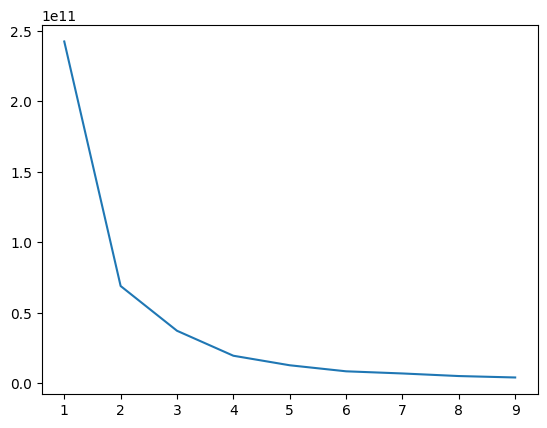

In [ ]:
sonuclar = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=59, n_init="auto")
  kmeans.fit(X)
  sonuclar.append(kmeans.inertia_)  # wcss gösteriyor

plt.plot(range(1,10), sonuclar)

In [ ]:
sonuclar

[242389963637.06992,
 69083341697.90192,
 37364401125.32412,
 19665092404.200546,
 12911405620.28405,
 8631986006.716362,
 7102822679.314535,
 5270162013.74505,
 4258824489.0305786]

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=59)
Y_tahmin = kmeans.fit_predict(X)
labels = kmeans.labels_
print(labels)

[3 3 3 0 0 0 0 3 0 2 2 3 2 0 3 1 3 0 3 3 0 0 3 2 1 2 0 3 0 2 0 2 2 3 2 2 2
 0 2 1 1 0 3 0 0 2 2 2 2 1 0 3 1 1 3 3 0 3 2 3 1 3 2 0 2 0 2 3 2 0 3 3 3 3
 0 0 1 3 2 0 0 0 2 2 1 3 3 2 0 0 3 0 1 2 0 2 0 3 0 0 2 1 3 0 0 3 3 2 2 1 1
 3 3 3 3 2 0 3 2 2 0 2 3 3 3 2 0 0 1 0 0 2 2 2 2 0 2 2 3 2 3 0 2 2 3 2 2 2
 2 0 2 2 3 0 2 1 0 2 1 0 2 2 0 2 0 2 2 3 0 0 3 0 0 2 3 0 0 2 1 2 2 3 2 1 3
 1 0 0 2 0 2 0 2 3 0 3 3 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


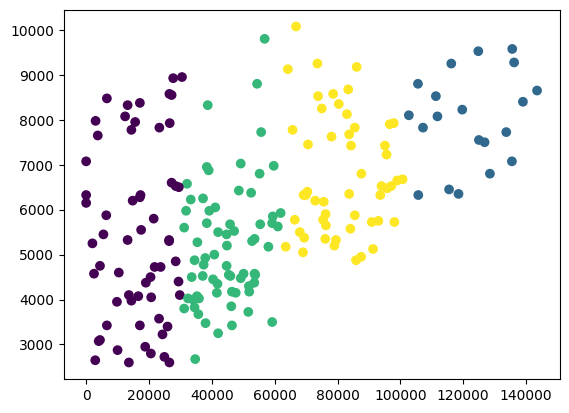

In [ ]:
plt.scatter(X["Hacim"],X["Maas"] ,c=kmeans.labels_.astype(float))
plt.show()

In [ ]:
#wcss, silhoutte, purity score

In [ ]:
from sklearn import metrics
ss = metrics.silhouette_score(X, labels, metric='euclidean')
ss

0.5470040977955256

In [ ]:
# we need ground true label for this
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=3, init="k-means++", random_state=59, n_init="auto")
mbk.fit(X)
labels = mbk.labels_
mbk.inertia_    #wcss


40821985079.20456

In [ ]:
ss = metrics.silhouette_score(X, labels, metric='euclidean')
ss

0.5232407411412564

In [ ]:
#mini batch performansı daha kötü

Hierarchial Clustering

In [ ]:
#Agglomerative
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters = 4, affinity= "euclidean", linkage="ward")
agc.fit(X)
print(agc.labels_)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


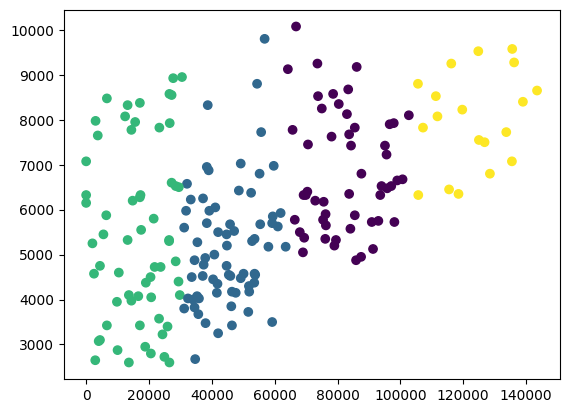

In [ ]:
plt.scatter(X["Hacim"],X["Maas"] ,c=agc.labels_.astype(float))
plt.show()

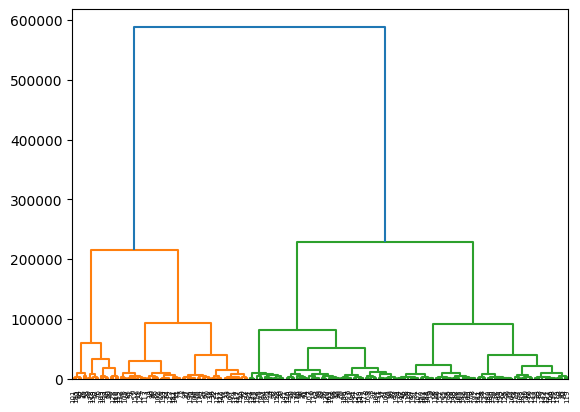

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.show()

In [ ]:
#dendograma göre galiba 4 cluster yapsak daha iyi olacak

DBScan ---> Density Based

In [ ]:
#first we use t-SNE to reduce dimentionality

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# perform PCA
pca_scores = PCA().fit_transform(X)
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

In [ ]:
df_pc

,0,1
0,16283.694639,-27.785787
1,25353.445955,-1375.092751
2,31915.724360,1090.090232
3,-36450.343899,3313.423501
4,-48118.435543,673.108674
...,...,...
195,43014.236598,893.491366
196,30112.593231,984.174553
197,-19662.443096,-1473.748070
198,-11628.138347,-169.927838


In [ ]:
# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components = 2, perplexity = 30.0, early_exaggeration = 12,
               n_iter = 500, learning_rate = 368, verbose = 1).fit_transform(df_pc.loc[:,0:49])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 5962.949220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.367012
[t-SNE] KL divergence after 500 iterations: 0.113499


In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=10)
clustering.fit(tsne_em)
labels = clustering.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


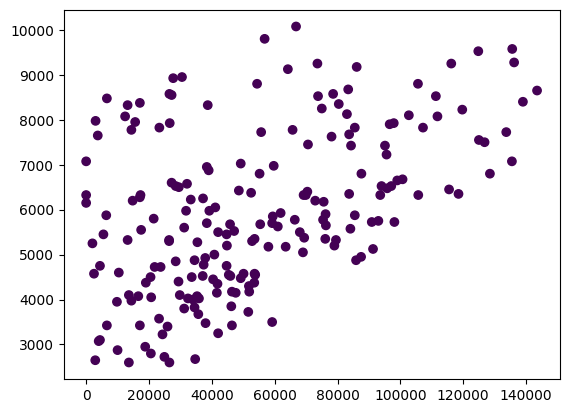

In [ ]:
plt.scatter(X["Hacim"],X["Maas"] ,c=clustering.labels_.astype(float))
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2500, min_samples=5)
clustering.fit(X)
labels = clustering.labels_
print(labels)

[ 0 -1  1  2  7  2  2  0  2  2  3  4  5  2  1 -1  4 -1 -1  0  2 -1  4  5
 -1  2  2  6  2  2  7  2  5  4  2  2  5 -1  5 -1 -1  2  1  2  7  2  2  3
  5 -1  2  0 -1 -1  6  1  2  1  2  6 -1  4  5  2  5  2  3  1  2  2  1 -1
  4 -1  2 -1 -1 -1  2  2  2  2  2  5 -1  0 -1  2  2  2 -1  2 -1  5  7  5
  2  1  7  7  2 -1 -1  2  2 -1  1  2  3 -1 -1  4 -1  0  4  2 -1  4  2  5
  2  5  4  6  0  5  2  2 -1  7  2  5  5  3  5  7  5  5  1  5  4  7  2  3
  6  5  2  2  2  2  2  2  0  7  5 -1  2  2 -1  2  5  2 -1  2  2  2  5  4
  2  2  1  2  2  2 -1  2 -1  5 -1  5  5 -1  3 -1  4 -1  7 -1  2  2  5 -1
  2  6  2  4  1  2  2  5]


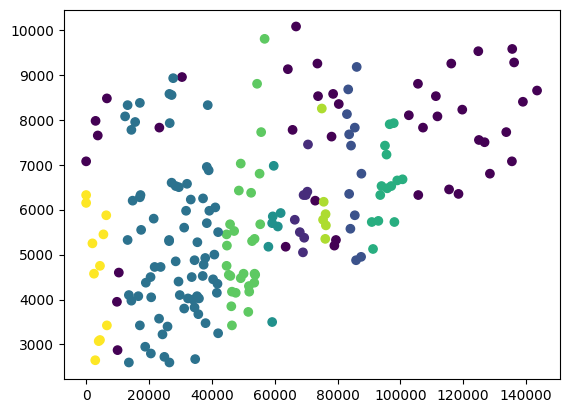

In [ ]:
plt.scatter(X["Hacim"],X["Maas"] ,c=clustering.labels_.astype(float))
plt.show()

In [ ]:
ss = metrics.silhouette_score(X, labels, metric='euclidean')
ss

0.20923262858982064

In [ ]:
# 2 cluster is not acceptable in this case, it's naturally going to be the best after 1 cluster